In [1]:
import pandas as pd

In [2]:
import os
import os.path

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import numpy as np

## House price per squared metre

In [6]:
# First read the list of London local authorities names

lanames = pd.read_csv('la-names.csv')

In [7]:
# Make them a list

names = lanames['Local authorities'].tolist()

In [8]:
path = "hpm_la_2023"

In [9]:
# Make list of files in a folder

list_directory = os.listdir("hpm_la_2023")

In [10]:
all_data = pd.DataFrame()

In [11]:
# Load only the files of London local authorities

for file_name in list_directory:
    if file_name in names:
        current_data = pd.read_csv(os.path.join(path,file_name))
        all_data = pd.concat([all_data,current_data])

In [12]:
all_data.head()

,priceper,year,dateoftransfer,propertytype,duration,price,postcode,lad21cd,transactionid,id,tfarea,numberrooms,classt,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,CONSTRUCTION_AGE_BAND
0,3723.297872,2014,2014-10-31,F,L,174995.0,IG11 9PD,E09000002,{EE5A935B-3263-4926-A9CF-C08C9678C776},20304911,47.0,NaN,11,73,73,NO DATA!
1,3635.294118,2017,2017-04-07,T,F,309000.0,RM10 9JR,E09000002,{4E95D757-50C4-EDA1-E050-A8C0630539E2},20336144,85.0,4.0,11,50,86,England and Wales: 1930-1949
2,1859.154930,2007,2007-10-15,T,F,132000.0,RM8 1TT,E09000002,{53F229AD-7C27-400C-BD12-89E03481FA39},20308677,71.0,3.0,12,70,90,England and Wales: 1950-1966
3,3131.313131,2016,2016-08-02,T,F,310000.0,RM10 7AS,E09000002,{3B7E0B8F-BC6D-EA99-E050-A8C062057E77},20312266,99.0,5.0,11,64,78,England and Wales: 1967-1975
4,1161.616162,2002,2002-05-14,S,F,115000.0,RM10 7AS,E09000002,{C5E68692-7234-4616-8052-563A850004DE},20312266,99.0,5.0,11,64,78,England and Wales: 1967-1975


In [13]:
all_data.shape

(2694256, 16)

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2694256 entries, 0 to 86181
Data columns (total 16 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   priceper                     float64
 1   year                         int64  
 2   dateoftransfer               object 
 3   propertytype                 object 
 4   duration                     object 
 5   price                        float64
 6   postcode                     object 
 7   lad21cd                      object 
 8   transactionid                object 
 9   id                           int64  
 10  tfarea                       float64
 11  numberrooms                  float64
 12  classt                       int64  
 13  CURRENT_ENERGY_EFFICIENCY    int64  
 14  POTENTIAL_ENERGY_EFFICIENCY  int64  
 15  CONSTRUCTION_AGE_BAND        object 
dtypes: float64(4), int64(5), object(7)
memory usage: 349.4+ MB


In [15]:
# Selecting columns we need

hpsm1 = all_data[['priceper','year','postcode']]

In [16]:
hpsm1.head()

,priceper,year,postcode
0,3723.297872,2014,IG11 9PD
1,3635.294118,2017,RM10 9JR
2,1859.154930,2007,RM8 1TT
3,3131.313131,2016,RM10 7AS
4,1161.616162,2002,RM10 7AS


In [17]:
# Selecting just the transactions of 2021

hpsm2 = hpsm1[hpsm1.year == 2021]

In [18]:
hpsm2.head()

,priceper,year,postcode
33,5729.166667,2021,IG11 9PD
74,3566.176471,2021,IG11 0XW
150,5031.746032,2021,RM9 5BE
190,4926.470588,2021,RM9 4EH
246,5015.197568,2021,IG11 0XW


In [19]:
hpsm2.shape

(105600, 3)

In [20]:
hpsm2.describe()

C:\anaconda\envs\ACV01\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,priceper,year
count,1.056000e+05,105600.0
mean,inf,2021.0
std,NaN,0.0
min,2.805300e+02,2021.0
25%,5.126050e+03,2021.0
50%,6.384615e+03,2021.0
75%,8.222222e+03,2021.0
max,inf,2021.0


In [21]:
inf_row = hpsm2[np.isinf(hpsm2['priceper'])]

In [22]:
inf_row.shape

(38, 3)

In [23]:
# drop 38 rows with infinite price value, from 105,600 rows, it is 0.03%
# first replace with nan

hpsm2.replace([np.inf, -np.inf], np.nan, inplace=True) 

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_8208\3620132768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpsm2.replace([np.inf, -np.inf], np.nan, inplace=True)


In [24]:
# then dropping all the rows with nan values 

hpsm2.dropna(inplace=True)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_8208\3731133809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpsm2.dropna(inplace=True)


## Postcode lookup

In [25]:
pcd = pd.read_csv('PCD_OA21_LSOA21_MSOA21_LAD_AUG23_UK_LU.csv', encoding='iso8859-1')

# guessing the encoding type: trial and error

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_8208\318503957.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pcd = pd.read_csv('PCD_OA21_LSOA21_MSOA21_LAD_AUG23_UK_LU.csv', encoding='iso8859-1')


In [26]:
pcd.head()

,pcd7,pcd8,pcds,dointr,doterm,usertype,oa21cd,lsoa21cd,msoa21cd,ladcd,lsoa21nm,msoa21nm,ladnm,ladnmw
0,AB1 0AA,AB1 0AA,AB1 0AA,198001,199606.0,0,S00090303,S01006514,S02001237,S12000033,NaN,NaN,Aberdeen City,NaN
1,AB1 0AB,AB1 0AB,AB1 0AB,198001,199606.0,0,S00090303,S01006514,S02001237,S12000033,NaN,NaN,Aberdeen City,NaN
2,AB1 0AD,AB1 0AD,AB1 0AD,198001,199606.0,0,S00090399,S01006514,S02001237,S12000033,NaN,NaN,Aberdeen City,NaN
3,AB1 0AE,AB1 0AE,AB1 0AE,199402,199606.0,0,S00091322,S01006853,S02001296,S12000034,NaN,NaN,Aberdeenshire,NaN
4,AB1 0AF,AB1 0AF,AB1 0AF,199012,199207.0,1,S00090299,S01006511,S02001236,S12000033,NaN,NaN,Aberdeen City,NaN


In [27]:
pcd.shape

(2694205, 14)

In [28]:
# Selecting columns we need

pcds = pcd[['pcds', 'msoa21cd', 'ladnm']]

In [29]:
pcds.head()

,pcds,msoa21cd,ladnm
0,AB1 0AA,S02001237,Aberdeen City
1,AB1 0AB,S02001237,Aberdeen City
2,AB1 0AD,S02001237,Aberdeen City
3,AB1 0AE,S02001296,Aberdeenshire
4,AB1 0AF,S02001236,Aberdeen City


In [30]:
# Load list of London local authorities names

lanms = pd.read_csv('local-authorities-names.csv')

In [31]:
lanms

,ladnm
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley
5,Camden
6,City of London
7,Croydon
8,Ealing
9,Enfield


In [32]:
# To filter only the postcodes in London

pcdla = pcds.merge(lanms, on=["ladnm"])

In [33]:
pcdla.head()

,pcds,msoa21cd,ladnm
0,BR1 1AA,E02000144,Bromley
1,BR1 1AB,E02000134,Bromley
2,BR1 1AD,E02000144,Bromley
3,BR1 1AE,E02000144,Bromley
4,BR1 1AF,E02000144,Bromley


In [34]:
pcdla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328803 entries, 0 to 328802
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   pcds      328803 non-null  object
 1   msoa21cd  328803 non-null  object
 2   ladnm     328803 non-null  object
dtypes: object(3)
memory usage: 7.5+ MB


In [35]:
pcdla = pcdla.rename(columns = {'pcds':'postcode'})

## Adding MSOA code to HPSM 

In [36]:
hpsm3 = pcdla.merge(hpsm2, on=["postcode"])

In [37]:
hpsm3.head()

,postcode,msoa21cd,ladnm,priceper,year
0,BR1 1AE,E02000144,Bromley,5714.285714,2021
1,BR1 1BQ,E02000144,Bromley,3671.875000,2021
2,BR1 1BQ,E02000144,Bromley,3617.021277,2021
3,BR1 1EG,E02000144,Bromley,9000.000000,2021
4,BR1 1EG,E02000144,Bromley,6775.362319,2021


In [38]:
hpsm3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105562 entries, 0 to 105561
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   postcode  105562 non-null  object 
 1   msoa21cd  105562 non-null  object 
 2   ladnm     105562 non-null  object 
 3   priceper  105562 non-null  float64
 4   year      105562 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ MB


In [39]:
hpsm3.describe()

,priceper,year
count,105562.000000,105562.0
mean,7125.992715,2021.0
std,3502.744618,0.0
min,280.529954,2021.0
25%,5125.018828,2021.0
50%,6383.609740,2021.0
75%,8219.178082,2021.0
max,282296.650718,2021.0


## Average price (per squared metre) for MSOA

In [40]:
hpsm = hpsm3.groupby('msoa21cd')['priceper'].mean().reset_index(name= 'price')

In [41]:
hpsm.head()

,msoa21cd,price
0,E02000001,12352.387268
1,E02000002,4365.344091
2,E02000003,4331.949819
3,E02000004,4696.123760
4,E02000005,4572.280104


In [42]:
hpsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msoa21cd  1002 non-null   object 
 1   price     1002 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [43]:
# Exporting file

# hpsm.to_csv('hpsm.csv', index=False)

### Visualisations

<Axes: xlabel='price', ylabel='Count'>

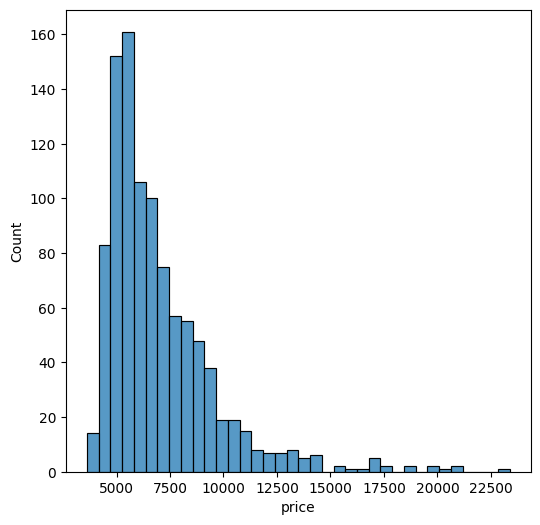

In [44]:
fig, axes = plt.subplots(figsize=(6,6))
sns.histplot(data=hpsm, x="price")

<Axes: ylabel='price'>

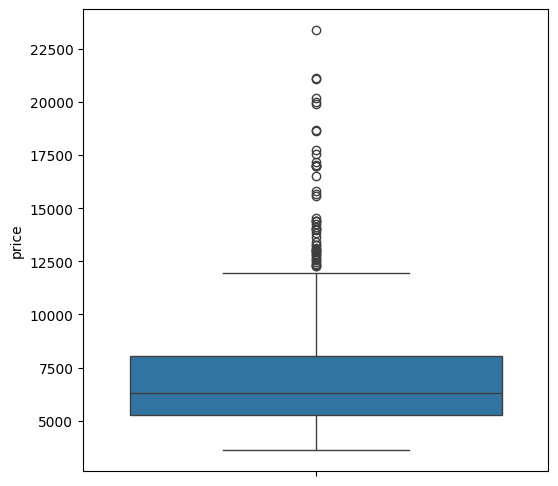

In [45]:
fig, axes = plt.subplots(figsize=(6,6))
sns.boxplot(data=hpsm, y="price")

## Logarithm

In [46]:
hpsm.loc[:,'Log10-price'] = np.log10(hpsm['price'])

In [47]:
hpsm.head()

,msoa21cd,price,Log10-price
0,E02000001,12352.387268,4.091751
1,E02000002,4365.344091,3.640018
2,E02000003,4331.949819,3.636683
3,E02000004,4696.123760,3.671740
4,E02000005,4572.280104,3.660133


In [48]:
hpsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msoa21cd     1002 non-null   object 
 1   price        1002 non-null   float64
 2   Log10-price  1002 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


In [49]:
hpsm.describe()

,price,Log10-price
count,1002.000000,1002.000000
mean,7011.301143,3.822779
std,2601.252755,0.134446
min,3616.442747,3.558282
25%,5273.039806,3.722061
50%,6285.370771,3.798331
75%,8021.809242,3.904272
max,23373.726629,4.368728


<Axes: ylabel='Log10-price'>

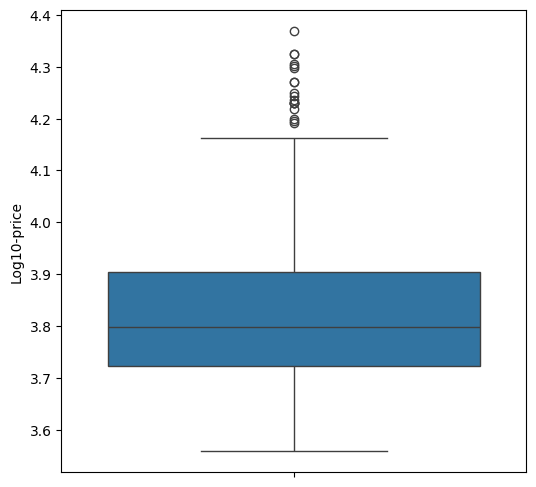

In [50]:
fig, axes = plt.subplots(figsize=(6,6))
sns.boxplot(data=hpsm, y="Log10-price")

<Axes: xlabel='Log10-price', ylabel='Count'>

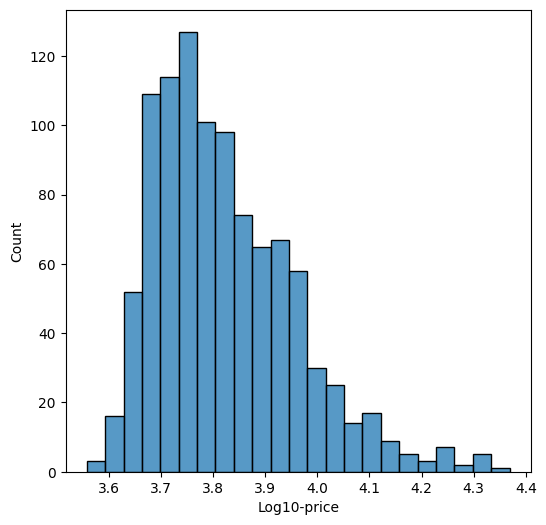

In [51]:
fig, axes = plt.subplots(figsize=(6,6))
sns.histplot(data=hpsm, x='Log10-price')

In [52]:
# Exporting file

hpsm.to_csv('hpsm.csv', index=False)

## Natural logarithm

In [53]:
hpsm.loc[:,'Ln-price'] = np.log(hpsm['price'])

In [54]:
hpsm.head()

,msoa21cd,price,Log10-price,Ln-price
0,E02000001,12352.387268,4.091751,9.421605
1,E02000002,4365.344091,3.640018,8.381452
2,E02000003,4331.949819,3.636683,8.373773
3,E02000004,4696.123760,3.671740,8.454493
4,E02000005,4572.280104,3.660133,8.427767


<Axes: ylabel='Ln-price'>

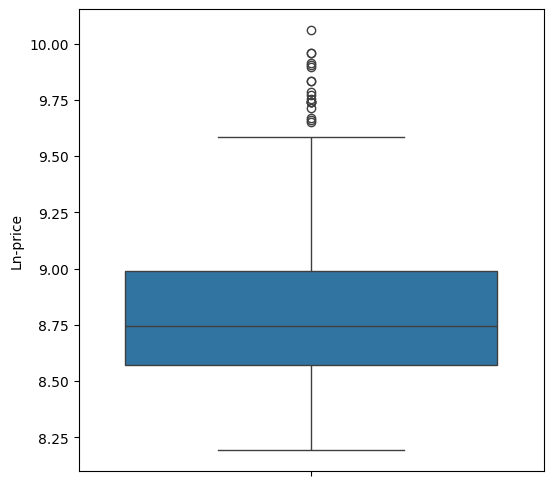

In [55]:
fig, axes = plt.subplots(figsize=(6,6))
sns.boxplot(data=hpsm, y="Ln-price")

<Axes: xlabel='Ln-price', ylabel='Count'>

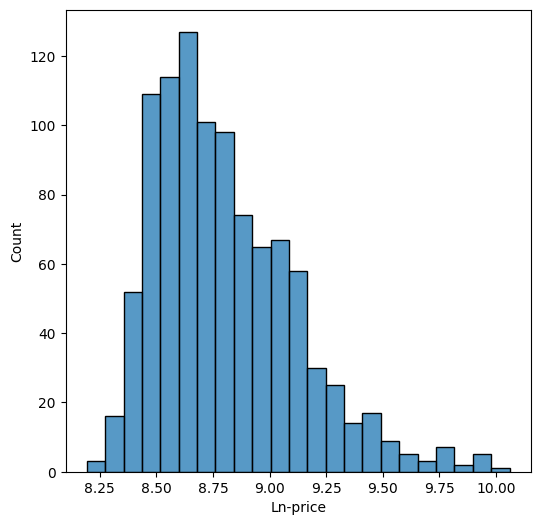

In [56]:
fig, axes = plt.subplots(figsize=(6,6))
sns.histplot(data=hpsm, x='Ln-price')

Not using this.